In [3]:
from pathlib import Path
import pandas as pd

# dossier source des fichier texte obtenu lors du scrapping 
folder = Path('D:/tp372/lyrics/lyrics_Artiste')

# lecture de tous les fichiers (lyrics) du contenu dans le fichier source 
texts = [f.read_text(encoding='utf-8') for f in folder.iterdir() if f.is_file()]

# tramsformation du slice (texts) en dataFrame.
df = pd.DataFrame({'lyrics': texts})

#affichage de quelques exemples
df

,lyrics
0,Parole de\n ...
1,Parole de\n ...
2,Parole de\n ...
3,Parole de\n ...
4,Parole de\n ...
...,...
685,Parole de\n ...
686,Parole de\n ...
687,Parole de\n ...
688,Parole de\n ...


In [2]:
#importation de ntlk 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('all')

[nltk_data] Error loading all: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
import string

def retirer_ponctuation(texte):
  table = str.maketrans('', '', string.punctuation)
  return texte.translate(table)

# fonction de prétraitement des lyrics 
def preprocess(text):
    text = text.split('\n')

    text = ''.join(text[2:])
    text = retirer_ponctuation(text)
    # transformation des lyrics en miniscules
    text = text.lower()

    # tokenization avec ntlk
    tokens = word_tokenize(text) 

    # combinaison des stop word (en , fr et cmr)
    stop_en = set(stopwords.words('english'))
    stop_fr = set(stopwords.words('french'))
    stop_cmr = set([
        "ekié","massah","wamda","per","moto",
        "ah","oh","eh","owoo","é","yo",
        "refrain","couplet",
    ])
    combined_stops = stop_en.union(stop_fr).union(stop_cmr)

    # retrait des stopword du lyrics
    token_filter = [t for t in tokens if t not in combined_stops]

    # Lemmanisation
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in token_filter]

    #reconstitution du texte traité
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

# création de la colonne "lyrics_clean" pour les lyrics prétraiter
df['lyrics_clean'] = df['lyrics'].apply(preprocess)
df

,lyrics,lyrics_clean
0,Parole de\n ...,top siintrombindo mbindo mbindo mbindo mbindoô...
1,Parole de\n ...,brendaelle scall brenda yamo bringue garstu na...
2,Parole de\n ...,lorphelinlorsque jélève voix travers luniversc...
3,Parole de\n ...,amour espoirayayaiyil retour aijo mamadou lion...
4,Parole de\n ...,nadiadis nadia sais ’ où viensde ’ afrique peu...
...,...,...
685,Parole de\n ...,maladie difficilemaladie difficile soigner oma...
686,Parole de\n ...,aucune autrej ’ connu mille elles ’ comme vert...
687,Parole de\n ...,back school smash beatzeeval flow nana heremy ...
688,Parole de\n ...,betterupcoming sugar daddyzeeval nanakeja keja...


In [5]:
## tokenisation avec TfidfVectorizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA


class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.toarray()


# pour diminuer le nombre de carractèristiques et éviter les problème de mémoire 
n_components_pca = 500 
pca = PCA(n_components=n_components_pca, random_state=0)

pipeline = make_pipeline(
    TfidfVectorizer(),
    DenseTransformer(),
    pca
)

x_transform = pipeline.fit_transform(df['lyrics_clean'])

x_transform

array([[-0.07922652, -0.06677303,  0.03956186, ..., -0.03388822,
         0.01264605, -0.04130241],
       [-0.01931625, -0.0556819 ,  0.02173464, ...,  0.02832611,
         0.05275671,  0.00136009],
       [-0.0550713 , -0.04662758, -0.02238646, ..., -0.02488006,
         0.04886601,  0.00522514],
       ...,
       [-0.01817945,  0.24411046,  0.05620827, ..., -0.00147973,
        -0.02391628,  0.00179203],
       [-0.03566115,  0.22696598, -0.0451478 , ...,  0.01207079,
         0.01827794,  0.01656243],
       [-0.05774665, -0.04583153,  0.03699306, ..., -0.04122714,
         0.02814046, -0.02046852]], shape=(690, 500))

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering 
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score, silhouette_samples 
import matplotlib.pyplot as plt
import seaborn as sns

k_range = range(2, 11)

## Kmeans

K-Means avec k = 2...
  Inertie: 551.95, Score de Silhouette: -0.01
K-Means avec k = 3...
  Inertie: 546.83, Score de Silhouette: -0.01
K-Means avec k = 4...
  Inertie: 545.45, Score de Silhouette: -0.01
K-Means avec k = 5...
  Inertie: 543.38, Score de Silhouette: -0.01
K-Means avec k = 6...
  Inertie: 542.33, Score de Silhouette: -0.00
K-Means avec k = 7...
  Inertie: 540.79, Score de Silhouette: -0.02
K-Means avec k = 8...
  Inertie: 539.42, Score de Silhouette: -0.01
K-Means avec k = 9...
  Inertie: 537.29, Score de Silhouette: -0.02
K-Means avec k = 10...
  Inertie: 536.55, Score de Silhouette: -0.03


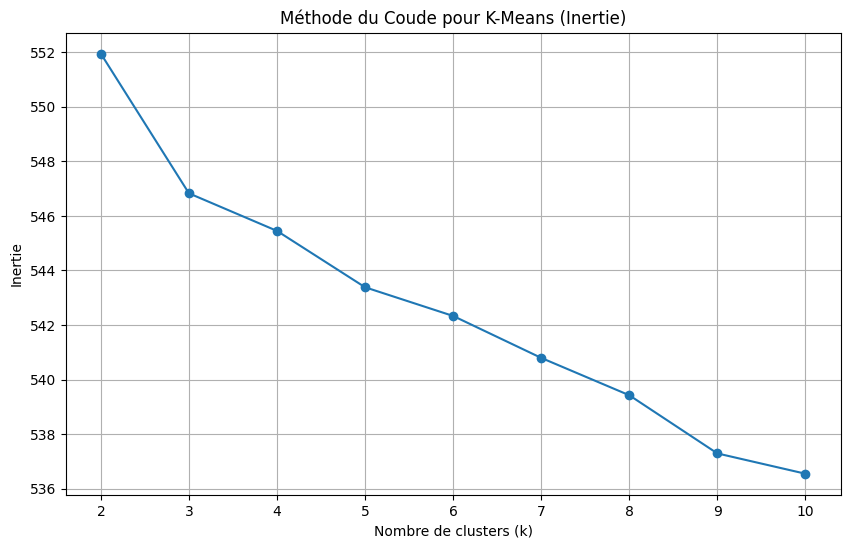

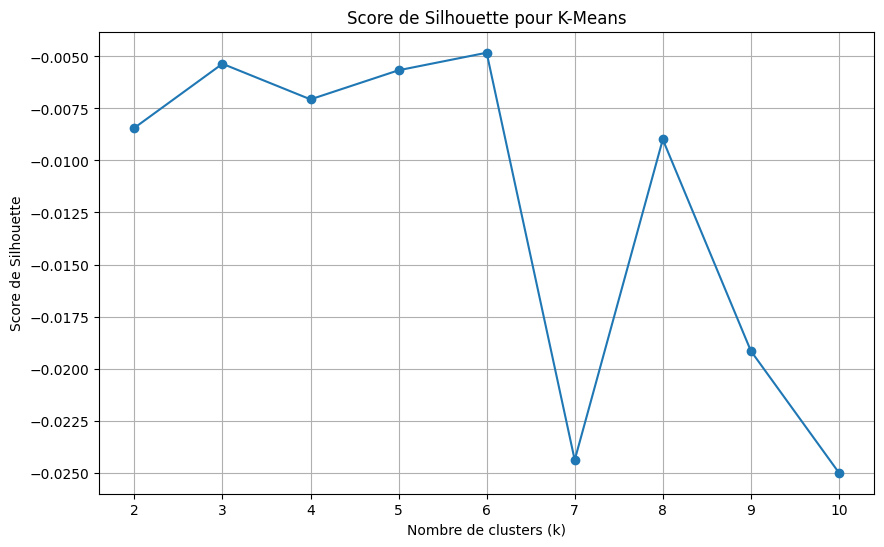


Meilleur K pour K-Means basé sur le score de silhouette: 6

Meilleur K pour K-Means basé sur l'inertie intra-cluster: 10


In [7]:
## metrics (inertie intra-cluster , scores de la silhouette )
kmeans_inertia = []
kmeans_silhouette_scores = []

##sauvegarde des models
kmeans_models = {}

for k in k_range:
    print(f"K-Means avec k = {k}...")
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) 
    kmeans.fit(x_transform)
    
    labels = "label"+str(k)
    df[labels] = kmeans.labels_

    # sauvegarde de l'inertie intra-cluster 
    inertia = kmeans.inertia_
    kmeans_inertia.append(inertia)

    # calcul du scores de la silhouette 
    silhouette_avg = silhouette_score(x_transform, df[labels])
    kmeans_silhouette_scores.append(silhouette_avg)
    print(f"  Inertie: {inertia:.2f}, Score de Silhouette: {silhouette_avg:.2f}")

    kmeans_models[k] = kmeans # Stockage du modèle 

# Visualisation de la méthode du coude pour K-Means (Inertie)
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_inertia, marker='o')
plt.title('Méthode du Coude pour K-Means (Inertie)')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Visualisation du Score de Silhouette pour K-Means
plt.figure(figsize=(10, 6))
plt.plot(k_range, kmeans_silhouette_scores, marker='o')
plt.title('Score de Silhouette pour K-Means')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choix du meilleur K pour K-Means basé sur la silhouette 
best_k_kmeans_silhouette = k_range[np.nanargmax(kmeans_silhouette_scores)]
print(f"\nMeilleur K pour K-Means basé sur le score de silhouette: {best_k_kmeans_silhouette}")

# choix du meilleur K pour K-Means basé sur inertie intra-cluster 
best_k_kmeans_inertie = k_range[np.nanargmin(kmeans_inertia)]
print(f"\nMeilleur K pour K-Means basé sur l'inertie intra-cluster: {best_k_kmeans_inertie}")

## Mélange Gaussien

GMM avec k = 2...
  Log-vraisemblance: 938.05, Score de Silhouette: -0.00
GMM avec k = 3...
  Log-vraisemblance: 949.23, Score de Silhouette: -0.02
GMM avec k = 4...
  Log-vraisemblance: 952.51, Score de Silhouette: -0.02
GMM avec k = 5...
  Log-vraisemblance: 957.37, Score de Silhouette: -0.03
GMM avec k = 6...
  Log-vraisemblance: 958.77, Score de Silhouette: -0.02
GMM avec k = 7...
  Log-vraisemblance: 963.23, Score de Silhouette: -0.03
GMM avec k = 8...
  Log-vraisemblance: 961.79, Score de Silhouette: -0.03
GMM avec k = 9...
  Log-vraisemblance: 964.23, Score de Silhouette: -0.03
GMM avec k = 10...
  Log-vraisemblance: 965.01, Score de Silhouette: -0.03


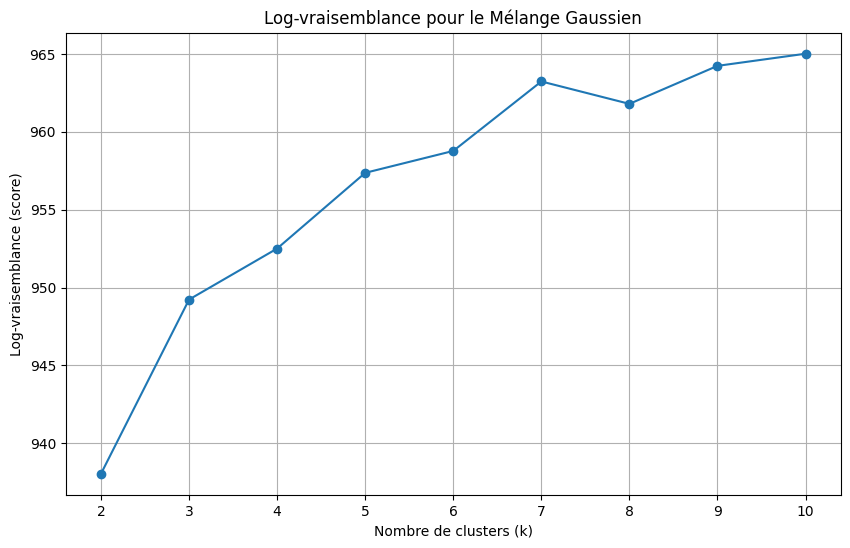

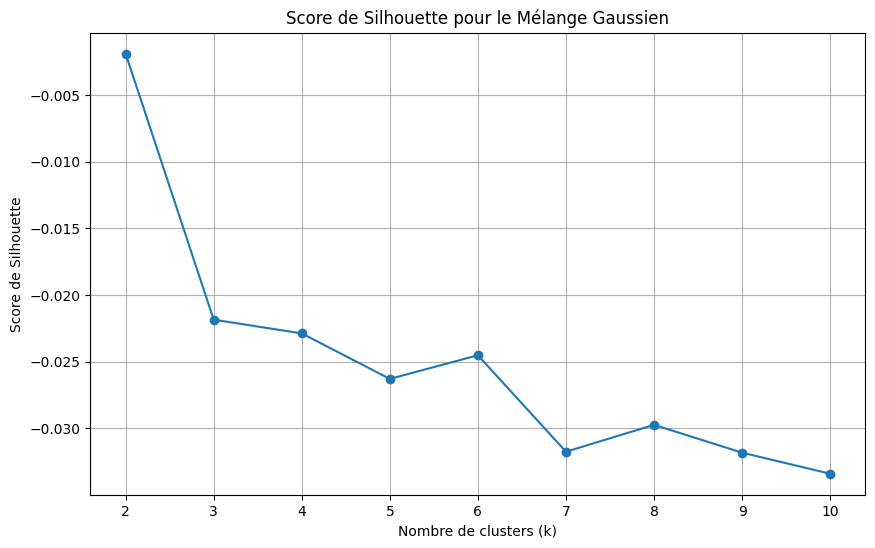


Meilleur K pour GMM basé sur le score de silhouette: 2
Meilleur K pour GMM basé sur la log-vraisemblance: 10


In [31]:
## metrics (vraissemblance , scores de la silhouette )
gmm_silhouette_scores = []
gmm_log_likelihoods = []

##sauvegarde du models 
gmm_models = {}

for k in k_range:
    print(f"GMM avec k = {k}...")
    gmm = GaussianMixture(n_components=k, random_state=0, covariance_type='diag', n_init=10)
    gmm.fit(x_transform)
    labels = "labelgmm"+str(k)
    df[labels] = gmm.predict(x_transform)

    #sauvegarde du logarithme de la vraissamblance 
    log_likelihood = gmm.score(x_transform) 
    gmm_log_likelihoods.append(log_likelihood)

    #calcul du scores de la silhouette 
    silhouette_avg = silhouette_score(x_transform, df[labels])
    gmm_silhouette_scores.append(silhouette_avg)

    print(f"  Log-vraisemblance: {log_likelihood:.2f}, Score de Silhouette: {silhouette_avg:.2f}")
    
    gmm_models[k] = gmm 

# Visualisation de la Log-vraisemblance pour GMM
plt.figure(figsize=(10, 6))
plt.plot(k_range, gmm_log_likelihoods, marker='o')
plt.title('Log-vraisemblance pour le Mélange Gaussien')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Log-vraisemblance (score)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Visualisation du Score de Silhouette pour GMM
plt.figure(figsize=(10, 6))
plt.plot(k_range, gmm_silhouette_scores, marker='o')
plt.title('Score de Silhouette pour le Mélange Gaussien')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de Silhouette')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choix du meilleur K pour GMM
best_k_gmm_silhouette = k_range[np.nanargmax(gmm_silhouette_scores)]
best_k_gmm_log_likelihood = k_range[np.argmax(gmm_log_likelihoods)]
print(f"\nMeilleur K pour GMM basé sur le score de silhouette: {best_k_gmm_silhouette}")
print(f"Meilleur K pour GMM basé sur la log-vraisemblance: {best_k_gmm_log_likelihood}")

## CHA

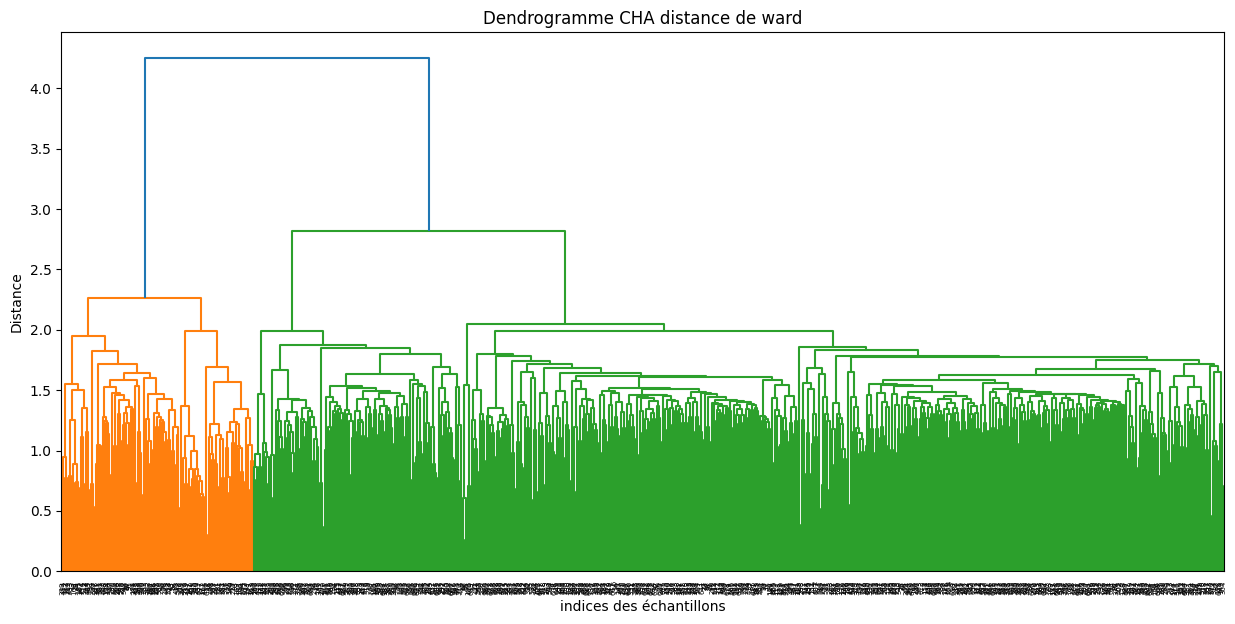

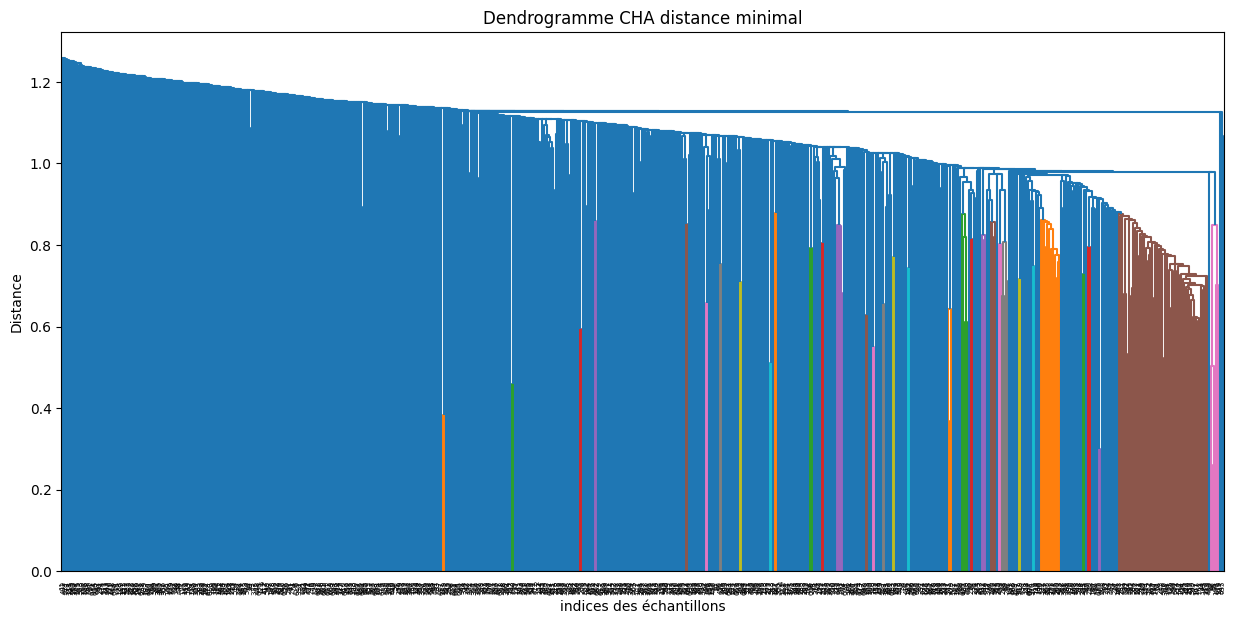

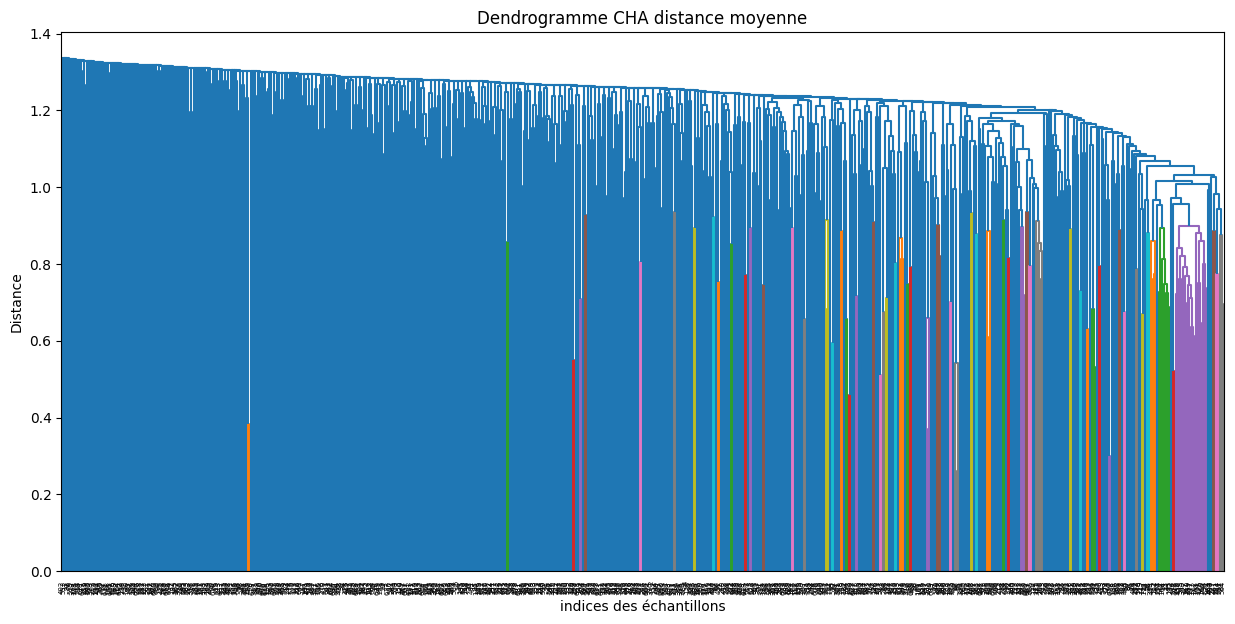

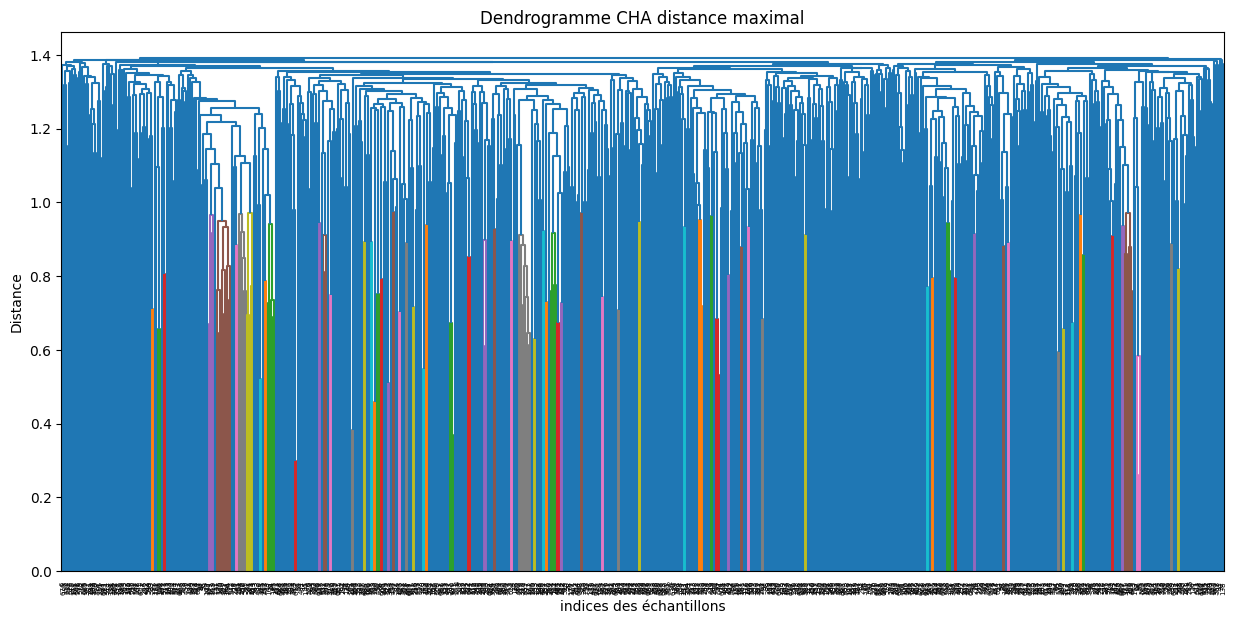

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
methods = {
    "ward":"distance de ward",
    "single":"distance minimal",
    "average":"distance moyenne",
    "complete":"distance maximal"
}

for method , dist in methods.items():
    Z = linkage(x_transform, method=method)
    plt.figure(figsize=(15, 7))
    dendrogram(Z)
    plt.title('Dendrogramme CHA '+ dist)
    plt.xlabel('indices des échantillons')
    plt.ylabel('Distance')
    plt.show()

